# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## Fit polynomial regression on this dataset for degrees 1 to 10. To do such a regression, consider only one variable and then run polynomial fit and plot the train and test errors w.r.t model complexity. You can also repeat this experiment for all the other variables. Also do not use <code>np.polyfit</code>function, but use the <code>LinearRegression()</code> using the scikit-learn library.</b>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from numpy import math
from collections import defaultdict
# visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# loading data from inbuilt from sklearn.datasets import load_boston because 'MEDV' column is not present in csv file
boston = pd.DataFrame(data = load_boston().data, columns= load_boston().feature_names)
boston['MEDV'] = load_boston().target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# first look
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# for another column change variable col as per your requirements
col = 'CRIM'

In [5]:
# creating new columns for maltiple degrees
degrees = np.arange(1,11,1)
df = pd.DataFrame()
df[col] = boston[col]
for i in range(2,11,1):
    df[col+str(i)] = boston[col]**i

In [6]:
df.head()

,CRIM,CRIM2,CRIM3,CRIM4,CRIM5,CRIM6,CRIM7,CRIM8,CRIM9,CRIM10
0,0.00632,0.000040,2.524360e-07,1.595395e-09,1.008290e-11,6.372392e-14,4.027352e-16,2.545286e-18,1.608621e-20,1.016648e-22
1,0.02731,0.000746,2.036878e-05,5.562715e-07,1.519177e-08,4.148874e-10,1.133057e-11,3.094380e-13,8.450751e-15,2.307900e-16
2,0.02729,0.000745,2.032407e-05,5.546438e-07,1.513623e-08,4.130677e-10,1.127262e-11,3.076297e-13,8.395215e-15,2.291054e-16
3,0.03237,0.001048,3.391783e-05,1.097920e-06,3.553968e-08,1.150419e-09,3.723908e-11,1.205429e-12,3.901973e-14,1.263069e-15
4,0.06905,0.004768,3.292237e-04,2.273289e-05,1.569706e-06,1.083882e-07,7.484207e-09,5.167845e-10,3.568397e-11,2.463978e-12


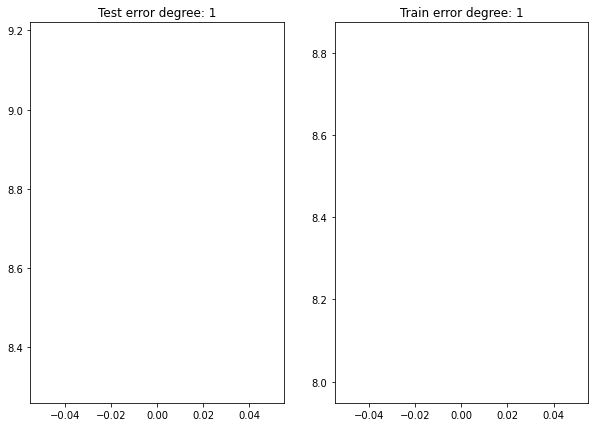

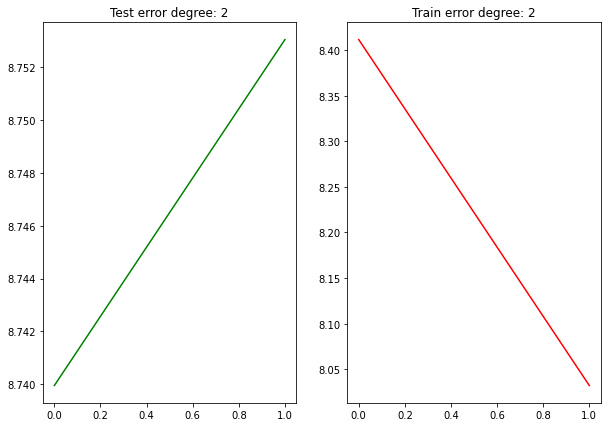

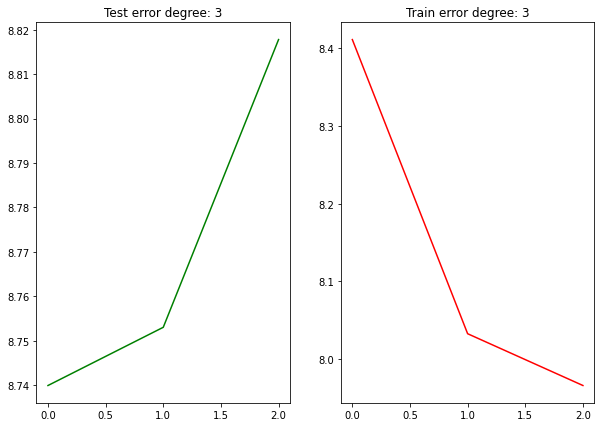

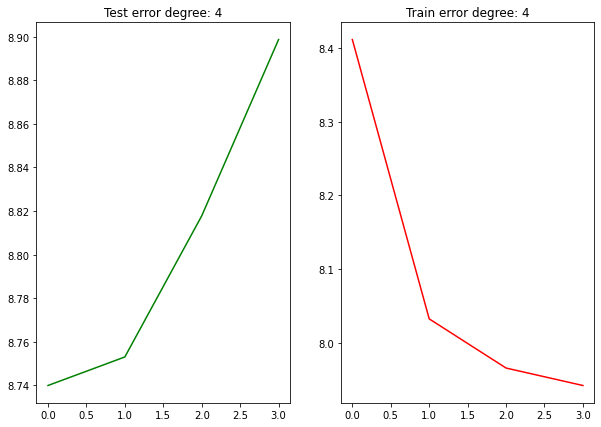

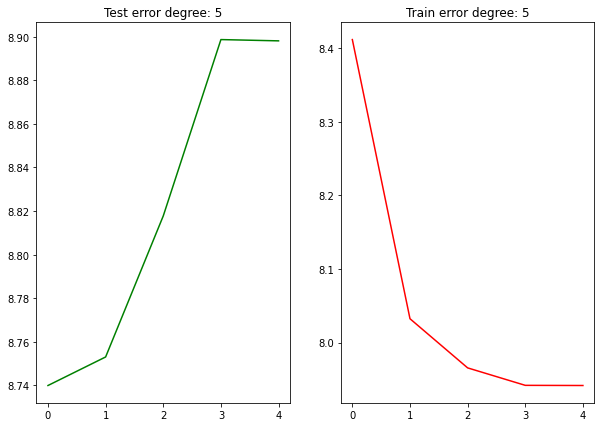

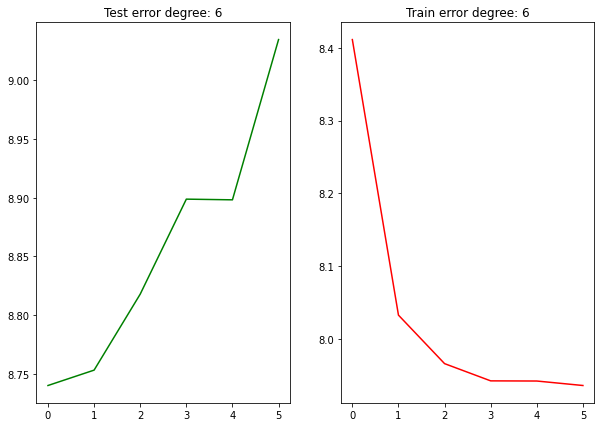

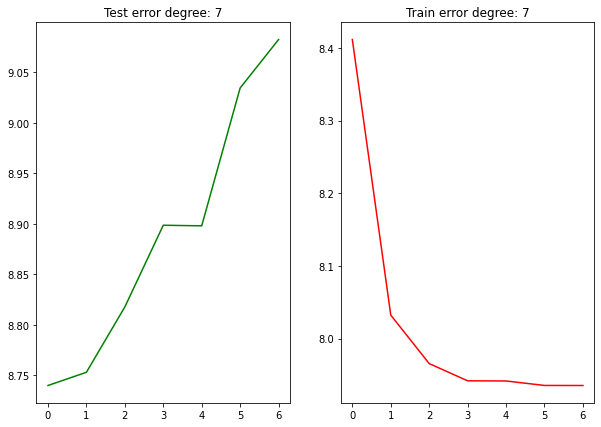

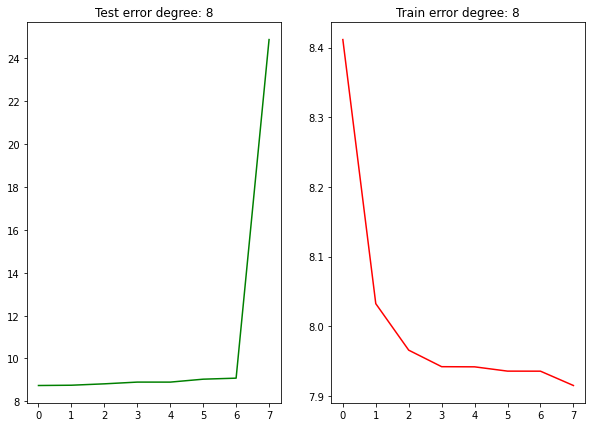

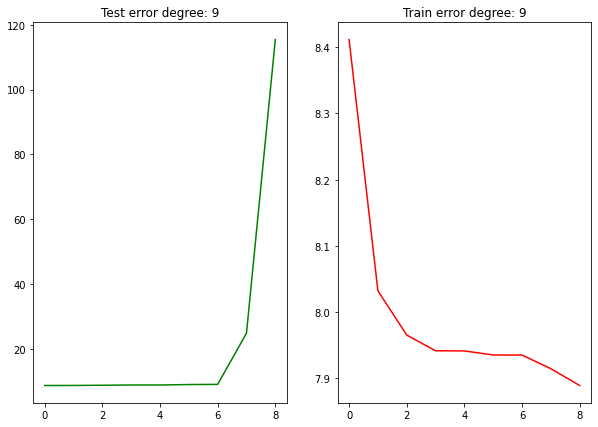

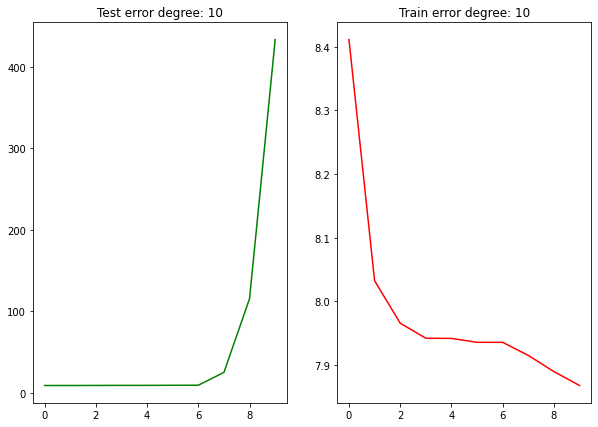

In [7]:
# training the model

from collections import defaultdict
pred_train = defaultdict(list)
pred_test = defaultdict(list)
train_rmse = []
test_rmse = []
for degree in degrees:
    X = df.iloc[:,:degree].values
    y = boston['MEDV'].values
    
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=0)
    scaler = MinMaxScaler()
    xtrain = scaler.fit_transform(xtrain)
    xtest = scaler.transform(xtest)
    regressor = LinearRegression()
    regressor.fit(xtrain,ytrain)
# train prediction
    train_pred = regressor.predict(xtrain)
    pred_train[degree].append(train_pred)
# rmse
    train_rmse.append(np.math.sqrt(mean_squared_error(ytrain,train_pred)))
# test prediction
    test_pred =regressor.predict(xtest)
# rmse
    test_rmse.append(np.math.sqrt(mean_squared_error(ytest,test_pred)))
    pred_test[degree].append(test_pred)
    
# visualisation of errors
    fix, axs = plt.subplots(1,2, figsize=(10,7))
    plt.sca(axs[0])
    plt.plot(test_rmse, color='green')
    plt.title("Test error degree: "+str(degree))
    plt.sca(axs[1])
    plt.plot(train_rmse, color ='red')
    plt.title("Train error degree: "+str(degree))